## Recap

### Search Strategies

* **Uninformed**
  *   Depth-First
    * Frontier selection: Last node added
    * Complete: No
    * Halts: No
    * Space: Linear
  *   Breadth-First
    * First node added
    * Complete: Yes
    * Halts: No
    * Space: Exponential
  *   Uniform Cost Search
    * Minimal `cost(p)`
    * Complete: Yes
    * Halts: No
    * Space: Exponential
* **Informed**
  *   Best-First
    * Global min `h(n)`
    * Complete: No
    * Halts: No
    * Space: Exponential
  *   A*
    * Minimal `f(p)`
    * Complete: Yes
    * Halts: No
    * Space: Exponential


*Complete — if there a path to a goal, it can find one, even on infinite graphs.*

*Halts — on finite graph (perhaps with cycles).*
*Space — as a function of the length of current path*

# Informed Search

Uses array of knowledge such as:

*   Distance from the goal.
*   Cost of the path.
*   How to reach the goal.

Useful to help agents to explore less in the search space by finding efficient path to the goal. Key idea behind this is *heuristic search* which utilises *heuristic function*.

## Heuristic Function
A heuristic function is a technique to solve a problem faster than classic methods, or to find an approximate solution when classic methods cannot. It solves a problem when there are no exact solutions for it or the time to obtain the solution is too long. The goal is to find a faster solution or an approximate one, even if it is not optimal. In other words, when using a heuristic, we trade accuracy for the speed of the solution.

### Direct Heuristic Search Techniques
Other names for these are Blind Search, Uninformed Search, and Blind Control Strategy. These aren’t always possible since they demand much time or memory.

They search the entire state space for a solution and use an arbitrary ordering of operations. Examples of these are **Breadth First Search (BFS)** and **Depth First Search (DFS)**.

### Weak Heuristic Search Techniques
Other names for these are Informed Search, Heuristic Search, and Heuristic Control Strategy. These are effective if applied correctly to the right types of tasks and usually demand domain-specific information.

We need this extra information to compute preference among child nodes to explore and expand. Each node has a heuristic function associated with it. Examples are **Best First Search (BFS)** and **A***.


## Best First Search
Best first will pick the node as its next step that is closest to the goal node as determined by the heuristic function. The simplest way to understand this is in a block maze. Best first algorithm will pick a block in the direction closest to the goal point based on Manhattan distance.

### Manhattan (or Taxicab or City Block or Snake) distance
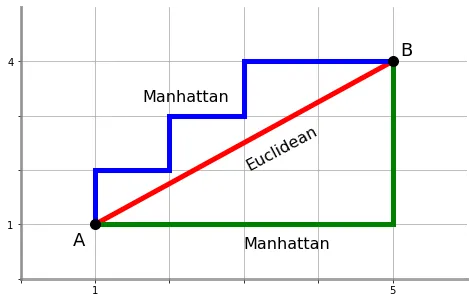

Manhattan distance is the distance between two points without considering the walls/obstacles. This applies well to a grid system, just like Manhattan, where Manhattanites would commonly use blocks as a scale. The diagram above shows the Manhattan distance and the Euclidean distance between points 
$A(1,1)$ and $B(5,4)$. The Manhattan distance is longer, and you can find it with more than one path. The Euclidean distance can be calculated using Pythagorean theorem; $c=\sqrt{a^2+b^2}$ whereas Manhattan distance $d$ for two $N$-dimensional points $\overrightarrow{a}=[a_1,a_2,...,a_N]$ and $\overrightarrow{b}=[b_1,b_2,...,b_N]$ can be calculated as $d=|a_1-b_1|+,...,+|a_N-b_N|$.

#### Example
Suppose you live at location $A(2,9)$ thus making your starting point $\overrightarrow{a}=[2,9]$. You want to buy some bread at the grocery store located at $B(3,5)$, so your destination is $\overrightarrow{b}=[3,5]$. Using the Manhattan distance formula, the total distance you'd have to walk is:

\begin{align}
        d&=|a_1-b_1|+|a_2-b_2|\\
        &=|2-3|+|9-5|\\
        &=1+4\\
        &=5
\end{align}

#### Python example:

In [ ]:
from math import sqrt

#function to calculate Manhattan distance 
def myownmanhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b)) #zip() function creates an iterator that will aggregate elements from two or more iterables.
 
#define vectors
A = [2,9]
B = [3,5]

#calculate Manhattan distance between vectors
print("Manhattan distance:", myownmanhattan(A, B))

Manhattan distance: 5


Alternatively, using Scipy's `cityblock()` function.

In [ ]:
from scipy.spatial.distance import cityblock

# define vectors
A = [2,9]
B = [3,5]

#calculate Manhattan distance between vectors
print("Manhattan distance:", cityblock(A, B))

Manhattan distance: 5


Back to Best First Search, suppose that we have the following graph:

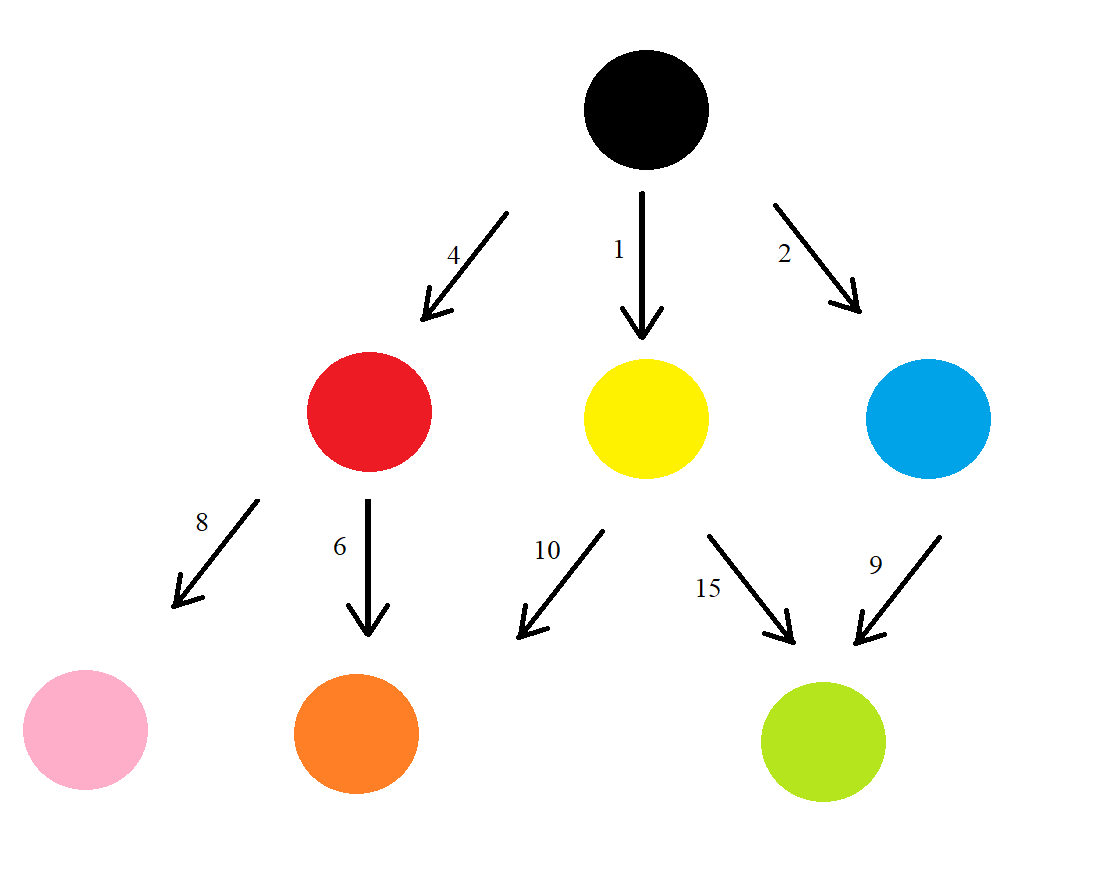

Each node is represented by a color. The edge from the first to the second node shows a number which is the cost that the algorithm incurs if it goes that route. Using best-first search, we use this cost as our heuristic function. The goal is to pick a node as the next step based on the lowest cost.

### Implementation
1. Start from the start node.
2. Get all neighboring nodes and put them in the queue.
3. Sort the queue based on the cost.
4. Search through the first item (which will be the lowest cost) in the queue:
> 1. If it is not target, add it to the visited list and remove it from the queue.
> 2. If it is the target node, stop the cycle.
5. Repeat the process with the last searched node as the start node.

### Python implementation
Define the graph and add the cost. The graph is represented by a dictionary that contains each node as a key. The value of the key is a list containing all the nodes that the key node is connected to. Each node in the list is represented by a tuple, that contains the color of the node and the cost that the algorithm incurs by moving from the key-node to the node in the tuple.


In [ ]:
graph = {"Black":[("Red",4), ("Yellow",1), ("Blue",2)], 
         "Red":[("Pink",8), ("Orange",6)],
         "Yellow":[("Orange",10), ("Green",15)],
         "Blue":[("Green",9)],
         "Pink":[],
         "Orange":[],
         "Green":[]}

#### Best First search function
The function takes a few parameters:

1. `start` node, from which the search starts.
2. `target` node (goal/destination).
3. `graph` - dictionary containing all nodes.
4. A `queue` - a list of all the neighboring nodes, to which the algorithm adds all the nodes that are connected to the node being analysed and also removes the node that has been analysed. 
5. `visited` - a list that contains all the nodes that have been analysed so that nodes are not repeated and we can keep track of the nodes that have been processed. If no value for queue and visited are provided, they are assigned the default value of empty lists.

Note that node extraction will be done using index numbers. This is because the connected nodes in `graph` are represented by tuple, so the queue contains those tuples as returned by the graph dictionary. Therefore, index is used to retrieve the color of the node. This is simply to make the printed information easier to understand.



In [ ]:
def bestfirst(start, target, graph, queue=[], visited=[]):
  if start not in visited:
    print(start)
    visited.append(start)
  
  queue=queue+[x for x in graph[start] if x[0][0] not in visited]
  
  # we use anonymous function (https://realpython.com/python-lambda/)
  # this is equivalent to 
  # def get_key(x):
  #  return x[1]
  queue.sort(key=lambda x:x[1]) 
 
  if queue[0][0]==target:
    print(queue[0][0])
  else:
    processing=queue[0]
    queue.remove(processing)
    bestfirst(processing[0], target, graph, queue, visited)

#### Example
Let’s say we want to reach the orange node start from the top, black node. We call the function as:

In [ ]:
bestfirst("Black", "Orange", graph)

Black
Yellow
Blue
Red
Orange


All the steps taken by the algorithm can be explained visually in the following diagram:

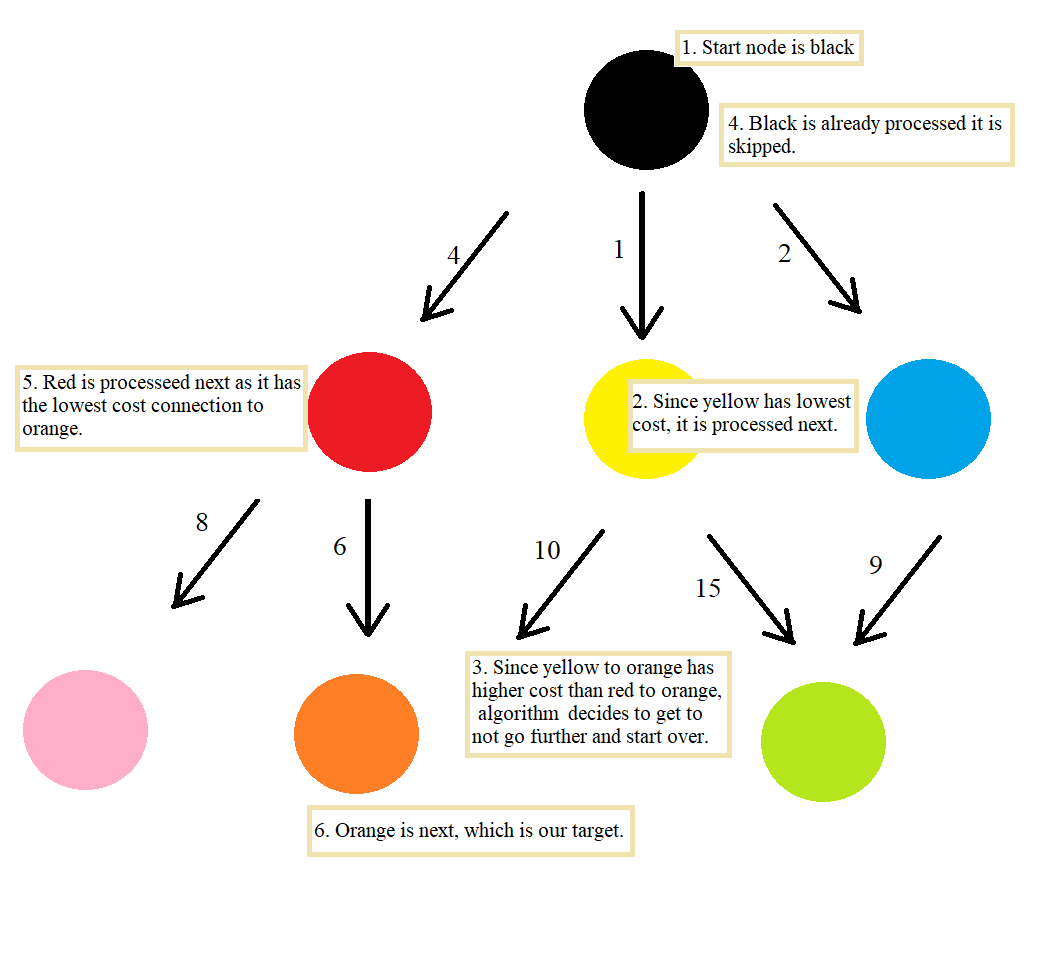

## A-star (*) search algorithm
It is an advanced form of the **Breadth-first** search algorithm, which searches for the shorter path first then, the longer paths. It is a complete as well as an optimal solution for solving path and grid problems. **Optimal** – finds the least cost from the starting point to the ending point. **Complete** – it will find all the available paths from start to end.

### Foundations
* $g(n)$ : The actual cost path from the start node to the current node. 
* $h(n)$ : The actual cost path from the current node to goal node.
* $f(n)$ : The actual cost path from the start node to the goal node.

Implementation of A* algorithm requires the use of `OPEN` : an array that contains the nodes that have been generated but have not been yet examined till yet. and `CLOSE` : an array which contains the nodes which are examined.

#### Steps
1. Place the starting node into `OPEN` and find its $f(n)$ value.
2. Remove the node from `OPEN`, having the smallest $f(n)$ value. *If* it is a goal node, then stop and return to success.
3. *Else* remove the node from `OPEN`, and find all its successors.
4. Find the $f(n)$ value of all the successors, place them into `OPEN`, and place the removed node into `CLOSE`.
5. Goto Step-2.
6. Exit.

### Pseudocode

```
let openList equal empty list of nodes
let closedList equal empty list of nodes
put startNode on the openList (leave it's f at zero)
while openList is not empty
    let currentNode equal the node with the least f value
    remove currentNode from the openList
    add currentNode to the closedList
    if currentNode is the goal
        You've found the exit!
    let children of the currentNode equal the adjacent nodes
    for each child in the children
        if child is in the closedList
            continue to beginning of for loop
        child.g = currentNode.g + distance b/w child and current
        child.h = distance from child to end
        child.f = child.g + child.h
        if child.position is in the openList's nodes positions
            if child.g is higher than the openList node's g
                continue to beginning of for loop
        add the child to the openList
```

### Python example

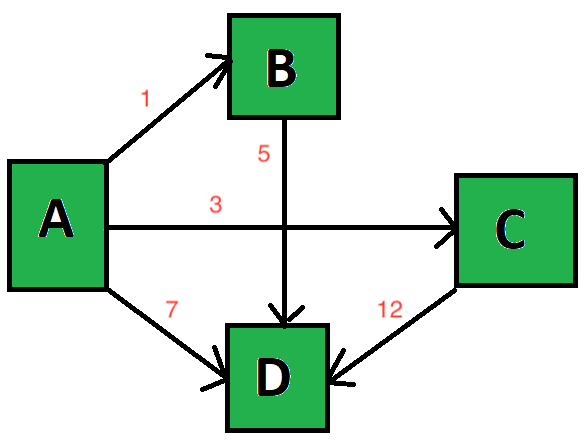

Assume that we have a directed graph above. We can define a class called `Graph` that will create graph instance as shown in the diagram above to search the shortest path to travel from one node to another. Function `a_star_algorithm()` maintains two queue arrays `openList` and `closedList`.




In [ ]:
class Graph:
  # constructor
  def __init__(self, adjacList):
    self.adjacList = adjacList
 
  # get function
  def get_neighbors(self, v):
    return self.adjacList[v]
 
  # This is heuristic function which is having equal values for all nodes
  def h(self, n):
    H = {'A': 1,
         'B': 1,
         'C': 1,
         'D': 1
        }
    return H[n]
 
  def a_star_algorithm(self, start, stop):
    # In this openList is a list of nodes which have been visited, but who's 
    # neighbours haven't all been always inspected.
    # It starts off with the start node and closedList is a list of nodes which have been visited
    # and who's neighbors have been always inspected
    openList = set([start])
    closedList = set([])
 
    # dists are distances from start to all other nodes
    # the default value is +infinity
    dists = {}
    dists[start] = 0                
 
    # par contains an adjac mapping of all nodes
    par = {}
    par[start] = start
 
    while len(openList) > 0:
      n = None
 
      # it will find a node with the lowest value of f(n) -
      for v in openList:
        if n == None or dists[v] + self.h(v) < dists[n] + self.h(n):
          n = v;
 
      if n == None:
        print('Path does not exist!')
        return None
 
      # if the current node is the stop then we start again from start
      if n == stop:
        reconst_path = []
 
        while par[n] != n:
          reconst_path.append(n)
          n = par[n]
 
        reconst_path.append(start)
        reconst_path.reverse()
 
        print('Best path found: {}'.format(reconst_path))
        return reconst_path
 
      # for all the neighbors of the current node do
      for (m, weight) in self.get_neighbors(n):
      # if the current node is not present in both openList and closedList add it to openList and note n as it's par
        if m not in openList and m not in closedList:
          openList.add(m)
          par[m] = n
          dists[m] = dists[n] + weight
 
        # otherwise, check if it's quicker to first visit n, then m
        # and if it is, update par data and poo data
        # and if the node was in the closedList, move it to openList
        else:
          if dists[m] > dists[n] + weight:
            dists[m] = dists[n] + weight
            par[m] = n
 
            if m in closedList:
              closedList.remove(m)
              openList.add(m)
 
      # remove n from the openList, and add it to closedList because all of his neighbors were inspected
      openList.remove(n)
      closedList.add(n)
 
    print('Path does not exist!')
    return None

In [ ]:
# create a graph
weighted_graph = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}

# create graph instance
testgraph = Graph(weighted_graph)

# search A -> D
testgraph.a_star_algorithm('A', 'D')

Best path found: ['A', 'B', 'D']


['A', 'B', 'D']